In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('fast')

# sim params
dt = 0.004
T = 60
steps = int(T/dt)

# sys params
a = .1 #damping factor
b = .2 #control effectiveness 

def clamp(n, min_val, max_val):
    return max(min_val, min(n, max_val))

def simulate(Kp, Ki, Kd, sp, initial):
    n = len(Kp)
    angle = np.full(n, initial) # initial
    i = np.full(n, 0.)
    prev_err = sp - angle.copy()
    
    out = [[] for _ in range(n)]
    time = []
    
    for j in range(steps):
        t = j * dt
        for y in range(n):
            err = sp - angle[y]
            
            i[y] += err * dt
            der = (err - prev_err[y]) / dt
            prev_err[y] = err
        
            u = Kp[y] * err + Ki[y] * i[y] + Kd[y] * der
        
            angle[y] += (-a * angle[y] + b * clamp(u, -90, 90)) * dt
        
            out[y].append(angle[y])
        time.append(t)
    return (out, time)

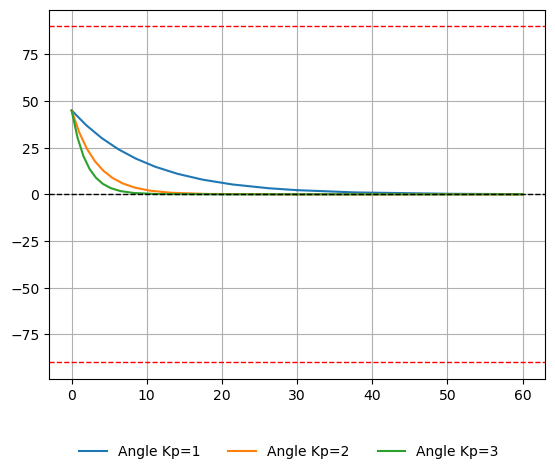

In [72]:
# gains
Kp = [0., 1., 2.]
Ki = np.full(3, 0.)
Kd = np.full(3, 0.)

out, time = simulate(Kp, Ki, Kd, 0., 45.)

fig, ax = plt.subplots()

ax.plot(time, out[0], label='Angle Kp=1')
ax.plot(time, out[1], label='Angle Kp=2')
ax.plot(time, out[2], label='Angle Kp=3')

ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.axhline(90, color='red', linewidth=1, linestyle='--')
ax.axhline(-90, color='red', linewidth=1, linestyle='--')
ax.grid(True)
fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
plt.show()